## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models.

Steps:
- EDA - Understand the data, look for missing values, class imbalance
- Skewness - Check for skewness in columns and remove skewness
- Split into train and test sets
- Run different classification models. For each model use k-fold cross validation to find the best model on training data. 
- Choose the best model from above step which has the best ROC_AUC score on training data
- Remove class imbalance in training data by applying oversampling, SMOTE and ADASYN
- Run the above models again on each of the balanced datasets and find model with best ROC_AUC score on test data.
- Compare the best models with and without class imbalance
- Analyze feature importance

The following models are created:
- Logistic Regression
- Decision Tree
- Random Forest
- XGBoost
- KNN

In the end of the exercise, we will find which classification model is best for data set, and whether class balancing helps the performance of model, and if yes, then which balancing technique is the most suitable.

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

## Exploratory data analysis

In [3]:
# Mounting google drive to colab to access dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/IIITB-AIML/Credit_Card_Fraud_Detection/creditcard.csv')

In [ ]:
pd.set_option('display.max_columns', None)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
#observe the different feature type present in the data


In [ ]:
df.shape

(284807, 31)

In [ ]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  """Entry point for launching an IPython kernel.


1. Total 284807 records in dataset
2. 28 PCA transformed feature variables + time from first transaction in the dataset + transaction amount
3. Class variable = 0 is Not Fraud, 1 is Fraud
4. All predictor variables are non-null and float data type. Class column is int (0/1)

Here we will observe the distribution of our classes

In [ ]:
classes=df['Class'].value_counts()
print(classes)
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100
print("Non fraud transaction % is", normal_share)
print("Fraud transaction % is", fraud_share)

0    284315
1       492
Name: Class, dtype: int64
Non fraud transaction % is 99.82725143693798
Fraud transaction % is 0.1727485630620034


As we see the dataset is highly imbalanced and the fraud tranactions are only 0.172%.

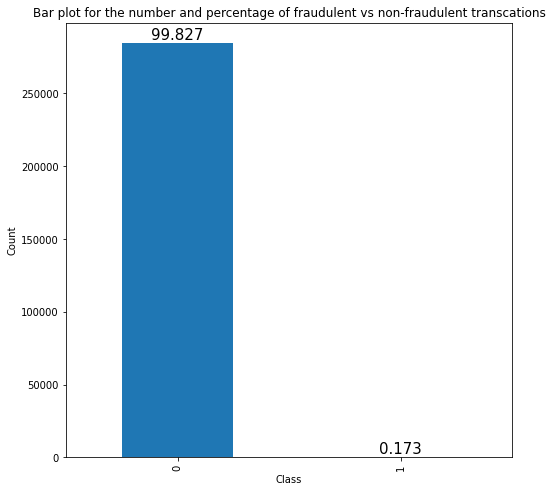

In [ ]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
plt.figure(figsize=(8, 8))
plot = df['Class'].value_counts().plot(kind='bar')
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Bar plot for the number and percentage of fraudulent vs non-fraudulent transcations");

for bar in plot.patches:
  plot.annotate(format((bar.get_height() / df.Class.count())*100, '.3f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

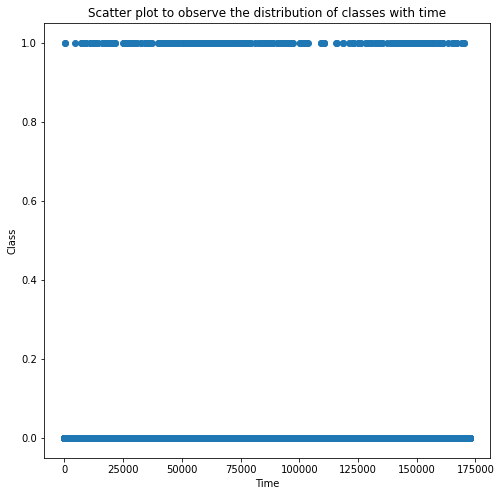

In [ ]:
# Create a scatter plot to observe the distribution of classes with time
plt.figure(figsize=(8, 8))
plt.scatter(df['Time'], df['Class'])
plt.xlabel("Time")
plt.ylabel("Class")
plt.title("Scatter plot to observe the distribution of classes with time");
plt.show()

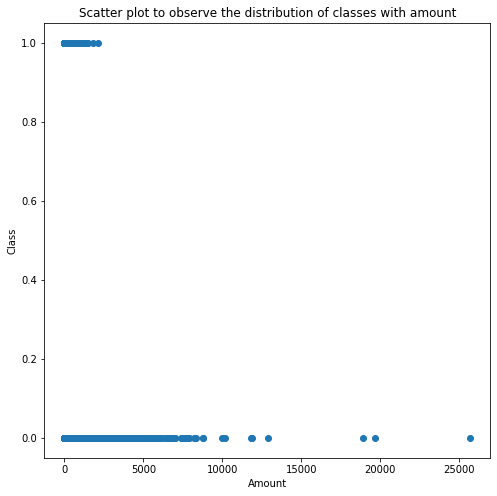

In [ ]:
# Create a scatter plot to observe the distribution of classes with Amount
plt.figure(figsize=(8, 8))
plt.scatter(df['Amount'], df['Class'])
plt.xlabel("Amount")
plt.ylabel("Class")
plt.title("Scatter plot to observe the distribution of classes with amount");
plt.show()

In [5]:
# Drop unnecessary columns
# Time column is the time difference from the first record in the dataset. Hence it is not required for prediction and can be dropped.
df.drop(['Time'], axis = 1, inplace=True)

In [ ]:
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')

### Splitting the data into train & test data

In [6]:
y= df['Class']
X = df.drop(['Class'], axis = 1)

In [7]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [ ]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
350
142


### Plotting the distribution of a variable

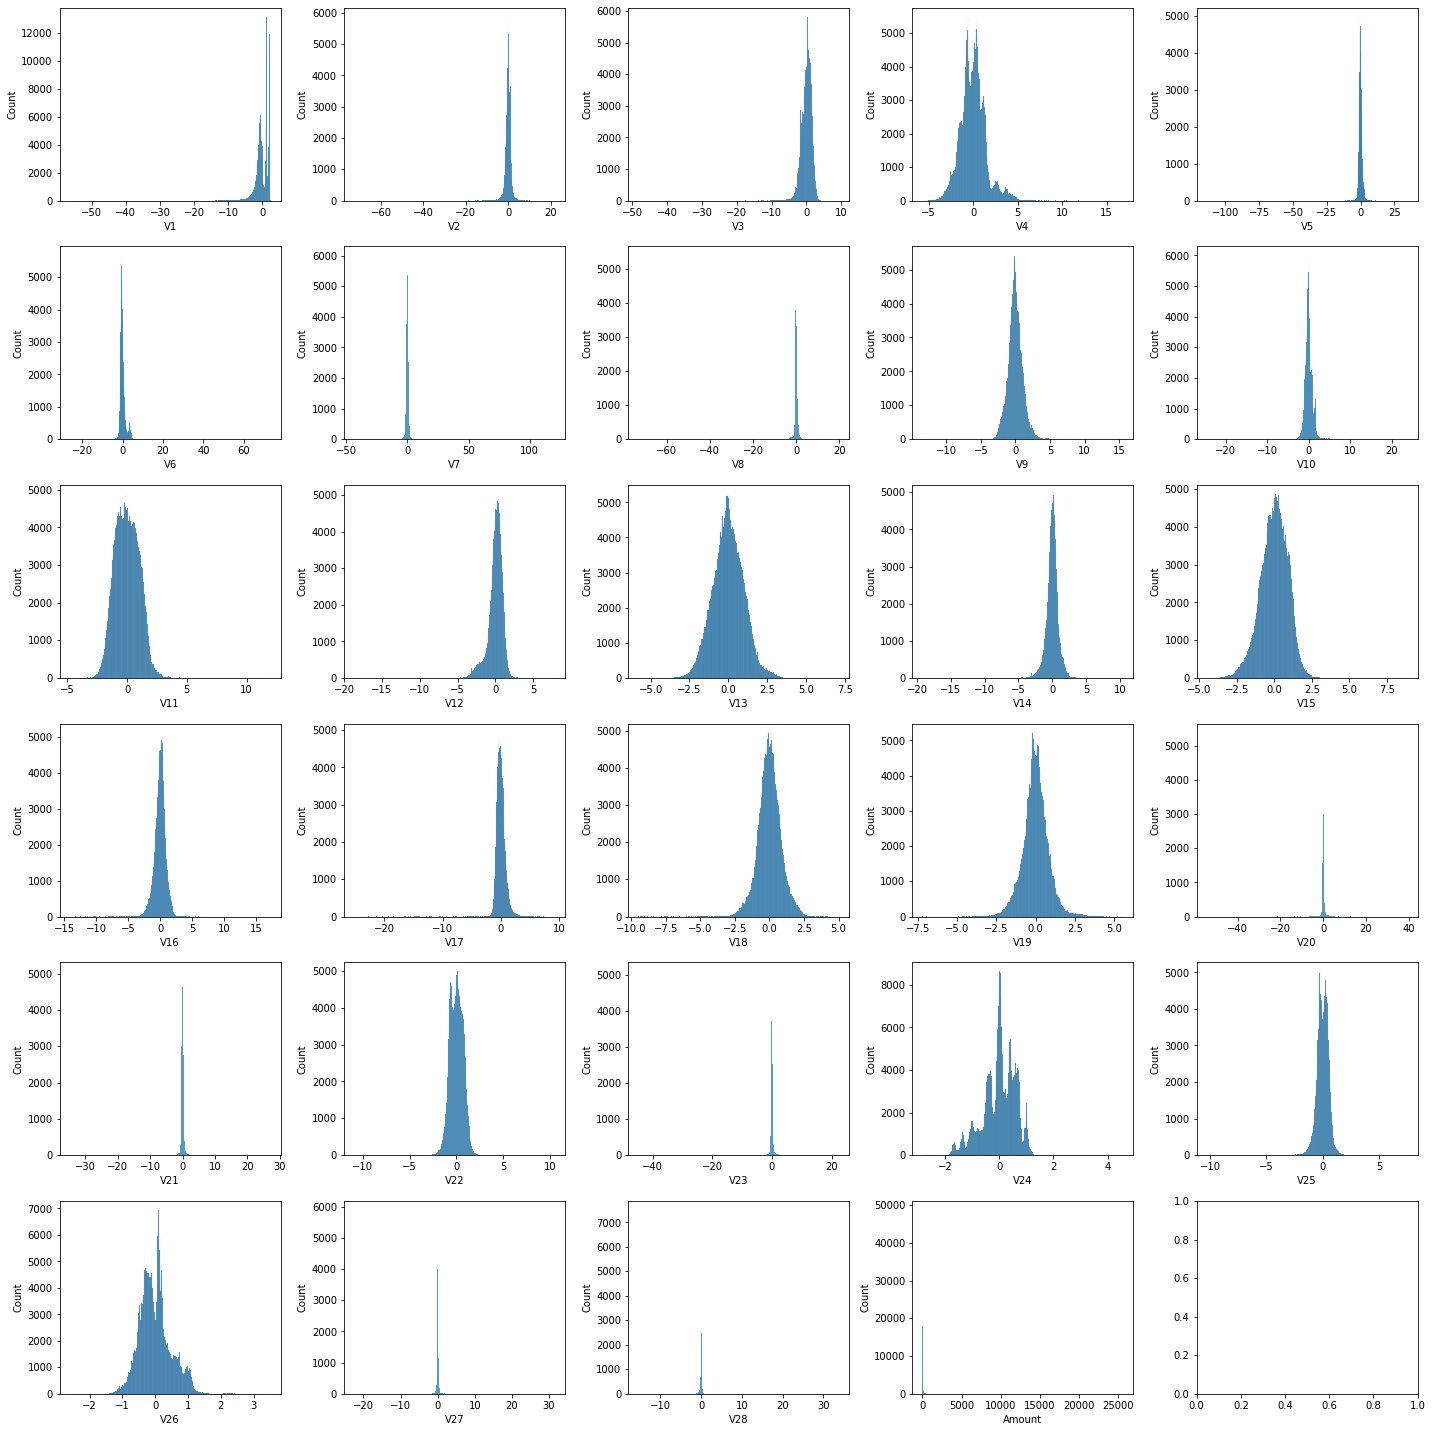

In [ ]:
# plot the histogram of a variable from the dataset to see the skewness
n_rows=6
n_cols=5
# Create the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 20))
for i, column in enumerate(X.columns):
    sns.histplot(df[column],ax=axes[i//n_cols,i%n_cols])
fig.tight_layout()

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

As seen in above plots, all variables V1 to V28 have gaussian or normalized distribution. This is because PCA has already been applied in the kaggle data set. The only variable which is slightly skewed is Amount.

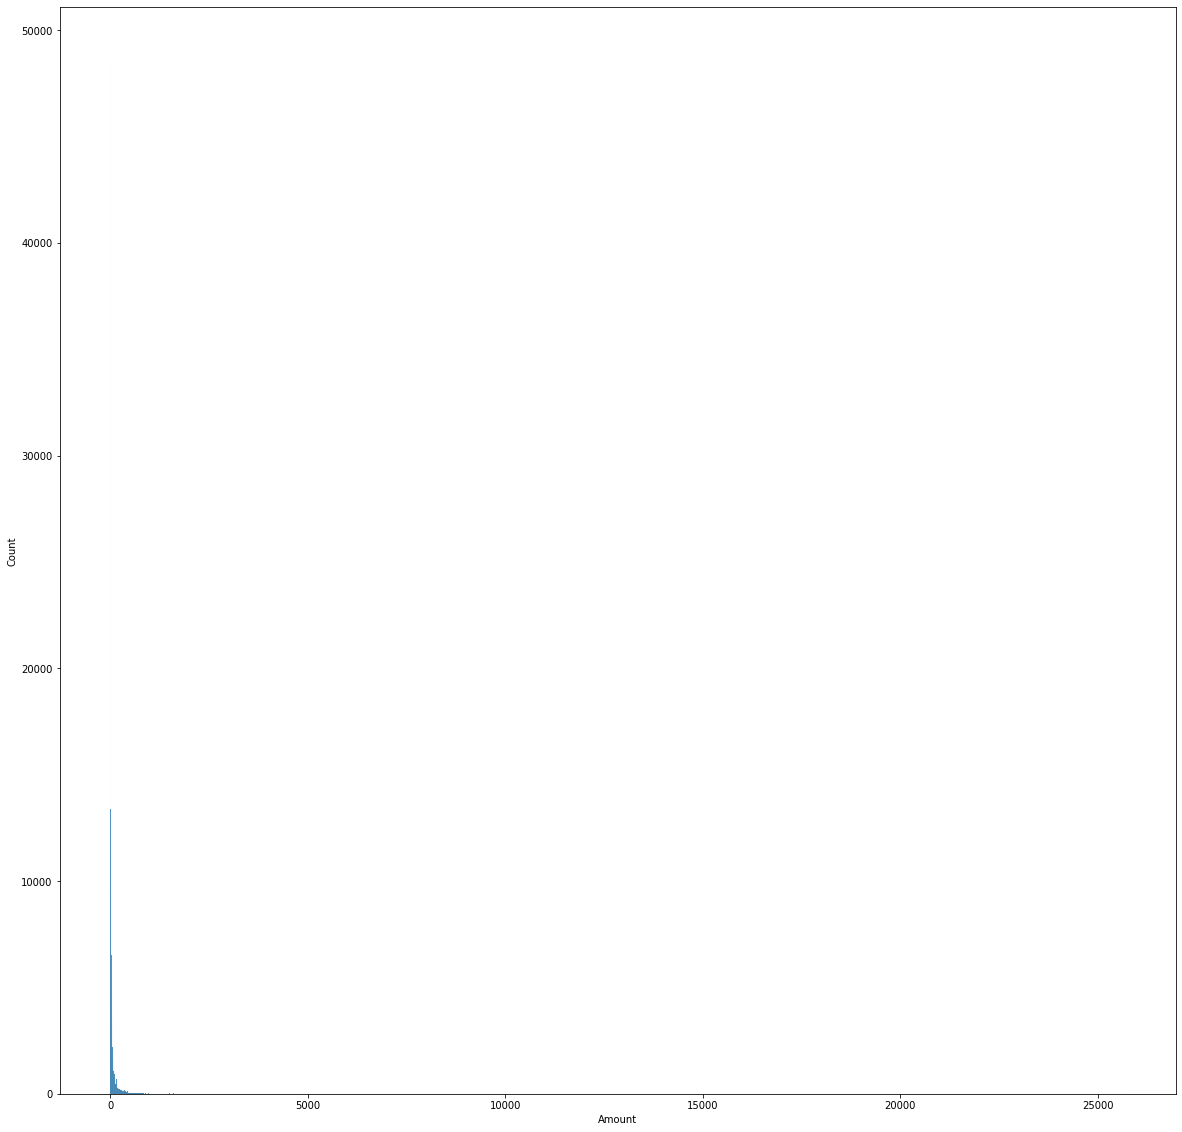

In [ ]:
plt.figure(figsize=(20, 20))
sns.histplot(df['Amount'])

In [ ]:
from scipy import stats
skew = stats.skew(df['Amount'])
print(skew)

16.97763503663315


In [8]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
from sklearn.preprocessing import PowerTransformer
amountDf = pd.DataFrame(df['Amount'])
power = PowerTransformer(method='yeo-johnson', standardize=True)
amount_trans = power.fit_transform(amountDf)

In [ ]:
skew = stats.skew(amount_trans)
print(skew)

[0.01835401]


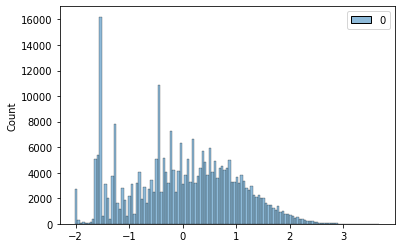

In [ ]:
# plot the histogram of a variable from the dataset again to see the result 
sns.histplot(amount_trans)

As we see above that using the power transformation we have removed the skewness in the data.

In [9]:
# Replacing amount column in training and test set

# Fit and transform train data
amountDf = pd.DataFrame(X_train['Amount'])
amount_trans = power.fit_transform(amountDf)
X_train['Amount'] = amount_trans

# Transform test data
amountDf = pd.DataFrame(X_test['Amount'])
amount_trans = power.transform(amountDf)
X_test['Amount'] = amount_trans

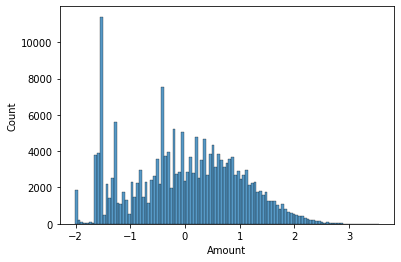

In [ ]:
sns.histplot(X_train['Amount'])

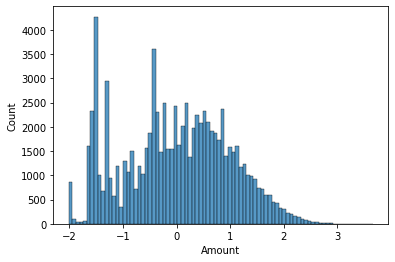

In [ ]:
sns.histplot(X_test['Amount'])

## Model Building
- Build different models on the imbalanced dataset and see the result

**Logistic Regression**

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

In [ ]:
# Logistic Regression
from sklearn import linear_model #import the package
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

#perform cross validation

# Create a cross-validation scheme
folds = KFold(n_splits = 4, shuffle = True, random_state = 100)

#perform hyperparameter tuning
# Specify range of hyperparameters to tune
hyper_params = {"C": [1.0, 10.0, 0.01, 0.001, 0.075], "penalty": ["l1", "l2"]}
# l1 = lasso, l2 = ridge

# Perform grid search
# Specify model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
rfe = RFE(logreg)    

# Call GridSearchCV()
model_cv = GridSearchCV(estimator = logreg, 
                        param_grid = hyper_params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solver

GridSearchCV(cv=KFold(n_splits=4, random_state=100, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [1.0, 10.0, 0.01, 0.001, 0.075],
                         'penalty': ['l1', 'l2']},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.021494,0.003782,0.000000,0.000000,1.0,l1,"{'C': 1.0, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN
1,1.566013,0.072388,0.023541,0.000485,1.0,l2,"{'C': 1.0, 'penalty': 'l2'}",0.975521,0.978077,0.977047,0.973963,0.976152,0.001557,4,0.977579,0.982003,0.982207,0.980883,0.980668,0.001853
2,0.018281,0.001415,0.000000,0.000000,10.0,l1,"{'C': 10.0, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN
3,1.526789,0.066959,0.023517,0.000268,10.0,l2,"{'C': 10.0, 'penalty': 'l2'}",0.975072,0.977449,0.976883,0.973304,0.975677,0.001627,5,0.977220,0.981775,0.981858,0.980703,0.980389,0.001886
4,0.019450,0.001976,0.000000,0.000000,0.01,l1,"{'C': 0.01, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN
5,0.709810,0.017503,0.023129,0.000524,0.01,l2,"{'C': 0.01, 'penalty': 'l2'}",0.982999,0.986488,0.983140,0.986716,0.984836,0.001769,2,0.986645,0.987163,0.987823,0.985259,0.986722,0.000943
6,0.018199,0.001233,0.000000,0.000000,0.001,l1,"{'C': 0.001, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN
7,0.445604,0.003010,0.022687,0.000382,0.001,l2,"{'C': 0.001, 'penalty': 'l2'}",0.982271,0.985261,0.986928,0.990205,0.986166,0.002867,1,0.988569,0.988002,0.987498,0.985709,0.987445,0.001071
8,0.017885,0.001321,0.000000,0.000000,0.075,l1,"{'C': 0.075, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN
9,1.162511,0.067598,0.023018,0.000111,0.075,l2,"{'C': 0.075, 'penalty': 'l2'}",0.979317,0.982308,0.978940,0.979047,0.979903,0.001395,3,0.980863,0.984034,0.984895,0.982451,0.983061,0.001542


In [ ]:
model_cv.best_score_

0.9861663973839037

In [ ]:
best_model = model_cv.best_estimator_
#print the optimum value of hyperparameters
best_model.get_params()

{'C': 0.001,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

So below we see the best model has C = 0.001 and l2 (Ridge) regulaization

In [ ]:
#print the evaluation result by choosing a evaluation metric

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


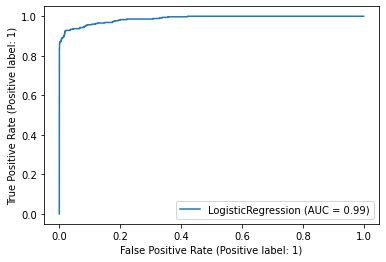

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(best_model, X_train, y_train)
plt.show()

In [ ]:
y_train_pred = best_model.predict(X_train)
y_train_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
"{:2.2}".format(metrics.roc_auc_score(y_train, y_train_pred))


'0.77'

Predicting on test data

In [ ]:
y_test_pred = best_model.predict(X_test)
y_test_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
"{:2.2}".format(metrics.roc_auc_score(y_test, y_test_pred))

'0.76'

## Conclusion on Logistic Regression
- Model ROC_AUC score = 0.986
- Model training score = 0.77
- Model test score = 0.76

**DecisionTree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=folds, verbose=1, scoring = "roc_auc", return_train_score=True)

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


GridSearchCV(cv=KFold(n_splits=4, random_state=100, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,1.669428,0.017108,0.019292,0.000353,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.912007,0.852804,0.902515,0.881412,0.887185,0.022729,48,0.882137,0.898003,0.878996,0.889732,0.887217,0.007349
1,1.650769,0.005291,0.018978,0.000104,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.912007,0.852804,0.902515,0.881412,0.887185,0.022729,48,0.882137,0.898003,0.878996,0.889732,0.887217,0.007349
2,1.647236,0.003279,0.019349,0.000547,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.912008,0.858652,0.902515,0.894519,0.891924,0.020182,47,0.882122,0.899880,0.878990,0.908762,0.892439,0.012340
3,1.652110,0.010696,0.019011,0.000220,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.918712,0.893911,0.915479,0.894512,0.905654,0.011501,42,0.902012,0.909283,0.897255,0.908759,0.904327,0.004989
4,1.656017,0.011826,0.018992,0.000178,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.918722,0.923201,0.915456,0.898840,0.914055,0.009205,37,0.911018,0.920538,0.908205,0.917176,0.914234,0.004875


In [ ]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=100,
                       random_state=42)

The best estimator hyperparameters are:
criterion='entropy', max_depth=5, min_samples_leaf=100,
                       random_state=42

In [ ]:
grid_search.best_score_

0.9595261854835309

As we see we get a very high roc_auc score.

In [ ]:
best_model = grid_search.best_estimator_
#print the optimum value of hyperparameters
best_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 100,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


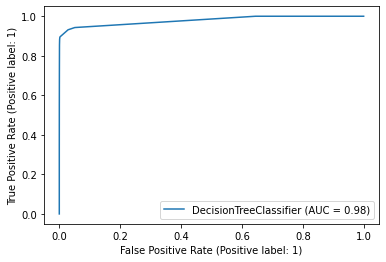

In [ ]:
plot_roc_curve(best_model, X_train, y_train)
plt.show()

In [ ]:
y_train_pred = best_model.predict(X_train)
y_train_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
"{:2.2}".format(metrics.roc_auc_score(y_train, y_train_pred))

'0.86'

Predicting on test data

In [ ]:
y_test_pred = best_model.predict(X_test)
y_test_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
"{:2.2}".format(metrics.roc_auc_score(y_test, y_test_pred))

'0.82'

In [ ]:
# Helper method to plot decision tree
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz
def get_dt_graph(dt_classifier):
    dot_data = StringIO()
    export_graphviz(dt_classifier, out_file=dot_data, filled=True,rounded=True,
                    feature_names=X.columns, 
                    class_names=['Disease', "No Disease"])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

Plotting best model decision tree

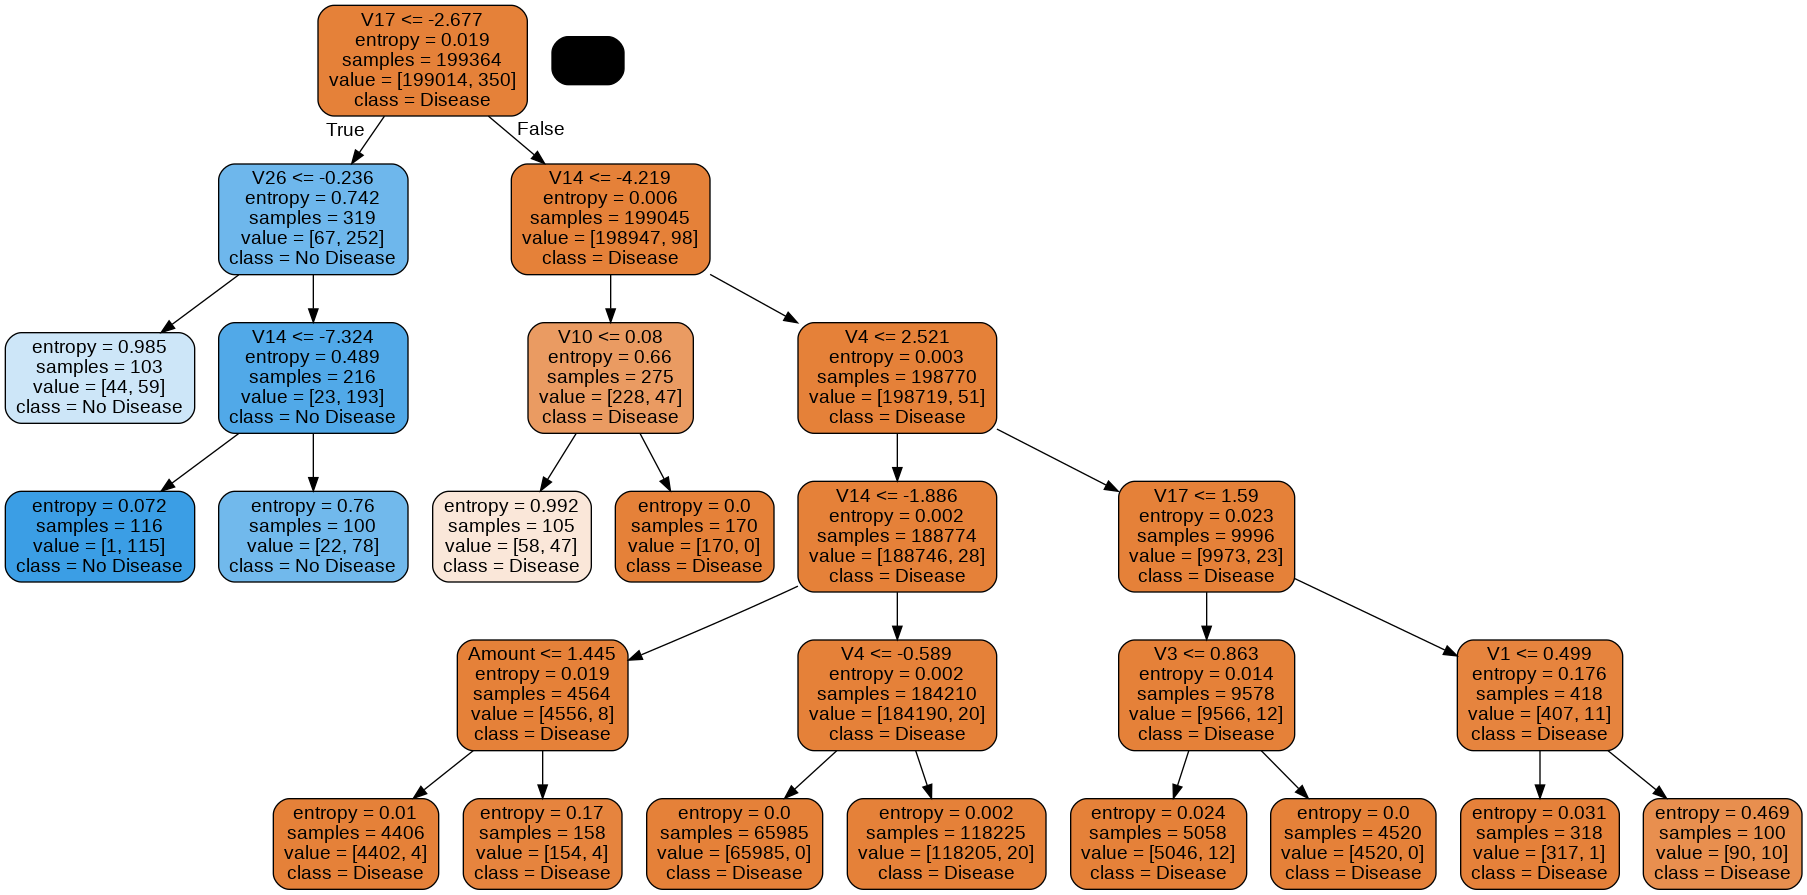

In [ ]:
gph = get_dt_graph(best_model)
Image(gph.create_png())

## Conclusion on Decision Trees
- Model ROC_AUC score = 0.959
- Model training score = 0.86
- Model test score = 0.82

**Random Forest**

### Ideally I want to go with following params in grid search:
- 'max_depth': [1, 2, 5, 10, 20],
- 'min_samples_leaf': [5, 10, 20, 50, 100],
- 'max_features': [5,10,15, 20, 25, 29],
- 'n_estimators': [10, 30, 50, 100, 200]

But since this takes a lot of time (Ran it for 3 hours and it did not complete), I am using params as mentioned below in grid search.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1)
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [10, 20],
    'min_samples_leaf': [50, 100],
    'max_features': [20, 25, 29],
    'n_estimators': [20, 50]
}
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=classifier_rf, param_grid=params, 
                          cv=folds, verbose=10, scoring = "roc_auc", return_train_score=True, n_jobs=1)

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 24 candidates, totalling 96 fits
[CV 1/4; 1/24] START max_depth=10, max_features=20, min_samples_leaf=50, n_estimators=20
[CV 1/4; 1/24] END max_depth=10, max_features=20, min_samples_leaf=50, n_estimators=20;, score=(train=0.998, test=0.961) total time=  37.9s
[CV 2/4; 1/24] START max_depth=10, max_features=20, min_samples_leaf=50, n_estimators=20
[CV 2/4; 1/24] END max_depth=10, max_features=20, min_samples_leaf=50, n_estimators=20;, score=(train=0.997, test=0.970) total time=  37.1s
[CV 3/4; 1/24] START max_depth=10, max_features=20, min_samples_leaf=50, n_estimators=20
[CV 3/4; 1/24] END max_depth=10, max_features=20, min_samples_leaf=50, n_estimators=20;, score=(train=0.997, test=0.966) total time=  37.6s
[CV 4/4; 1/24] START max_depth=10, max_features=20, min_samples_leaf=50, n_estimators=20
[CV 4/4; 1/24] END max_depth=10, max_features=20, min_samples_leaf=50, n_estimators=20;, score=(train=0.999, test=0.962) total time=  36.7s
[CV 1/4; 2/24] START ma

GridSearchCV(cv=KFold(n_splits=4, random_state=100, shuffle=True),
             estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=1,
             param_grid={'max_depth': [10, 20], 'max_features': [20, 25, 29],
                         'min_samples_leaf': [50, 100],
                         'n_estimators': [20, 50]},
             return_train_score=True, scoring='roc_auc', verbose=10)

In [ ]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_n_estimators,params,split0_test_score,...,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,37.193716,0.440135,0.117353,0.000640,10,20,50,20,"{'max_depth': 10, 'max_features': 20, 'min_sam...",0.960797,...,0.961824,0.964726,0.003691,19,0.998115,0.996803,0.996773,0.999014,0.997676,0.000943
1,92.229875,0.593791,0.218374,0.000709,10,20,50,50,"{'max_depth': 10, 'max_features': 20, 'min_sam...",0.960176,...,0.971631,0.967789,0.007478,10,0.998335,0.998361,0.997406,0.999131,0.998308,0.000611
2,36.845531,0.313054,0.117910,0.001046,10,20,100,20,"{'max_depth': 10, 'max_features': 20, 'min_sam...",0.960942,...,0.970272,0.971320,0.006961,2,0.998223,0.997965,0.996956,0.998698,0.997960,0.000637
3,90.864203,0.597452,0.218150,0.001184,10,20,100,50,"{'max_depth': 10, 'max_features': 20, 'min_sam...",0.963606,...,0.971124,0.970898,0.005118,3,0.998188,0.998346,0.997741,0.998688,0.998241,0.000340
4,45.824178,0.204535,0.115963,0.000250,10,25,50,20,"{'max_depth': 10, 'max_features': 25, 'min_sam...",0.958397,...,0.959981,0.965310,0.006147,17,0.998446,0.996684,0.996664,0.998099,0.997473,0.000809


In [ ]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=10, max_features=25, min_samples_leaf=100,
                       n_estimators=50, n_jobs=-1, random_state=42)

In [ ]:
grid_search.best_score_

0.9731537602018578

In [ ]:
best_model = grid_search.best_estimator_
#print the optimum value of hyperparameters
best_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 25,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 100,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


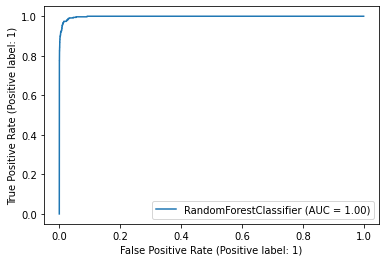

In [ ]:
plot_roc_curve(best_model, X_train, y_train)
plt.show()

In [ ]:
y_train_pred = best_model.predict(X_train)
"{:2.2}".format(metrics.roc_auc_score(y_train, y_train_pred))

'0.86'

Predicting on test data

In [ ]:
y_test_pred = best_model.predict(X_test)
"{:2.2}".format(metrics.roc_auc_score(y_test, y_test_pred))

'0.82'

Plotting best model random forest for a sample from best estimator model

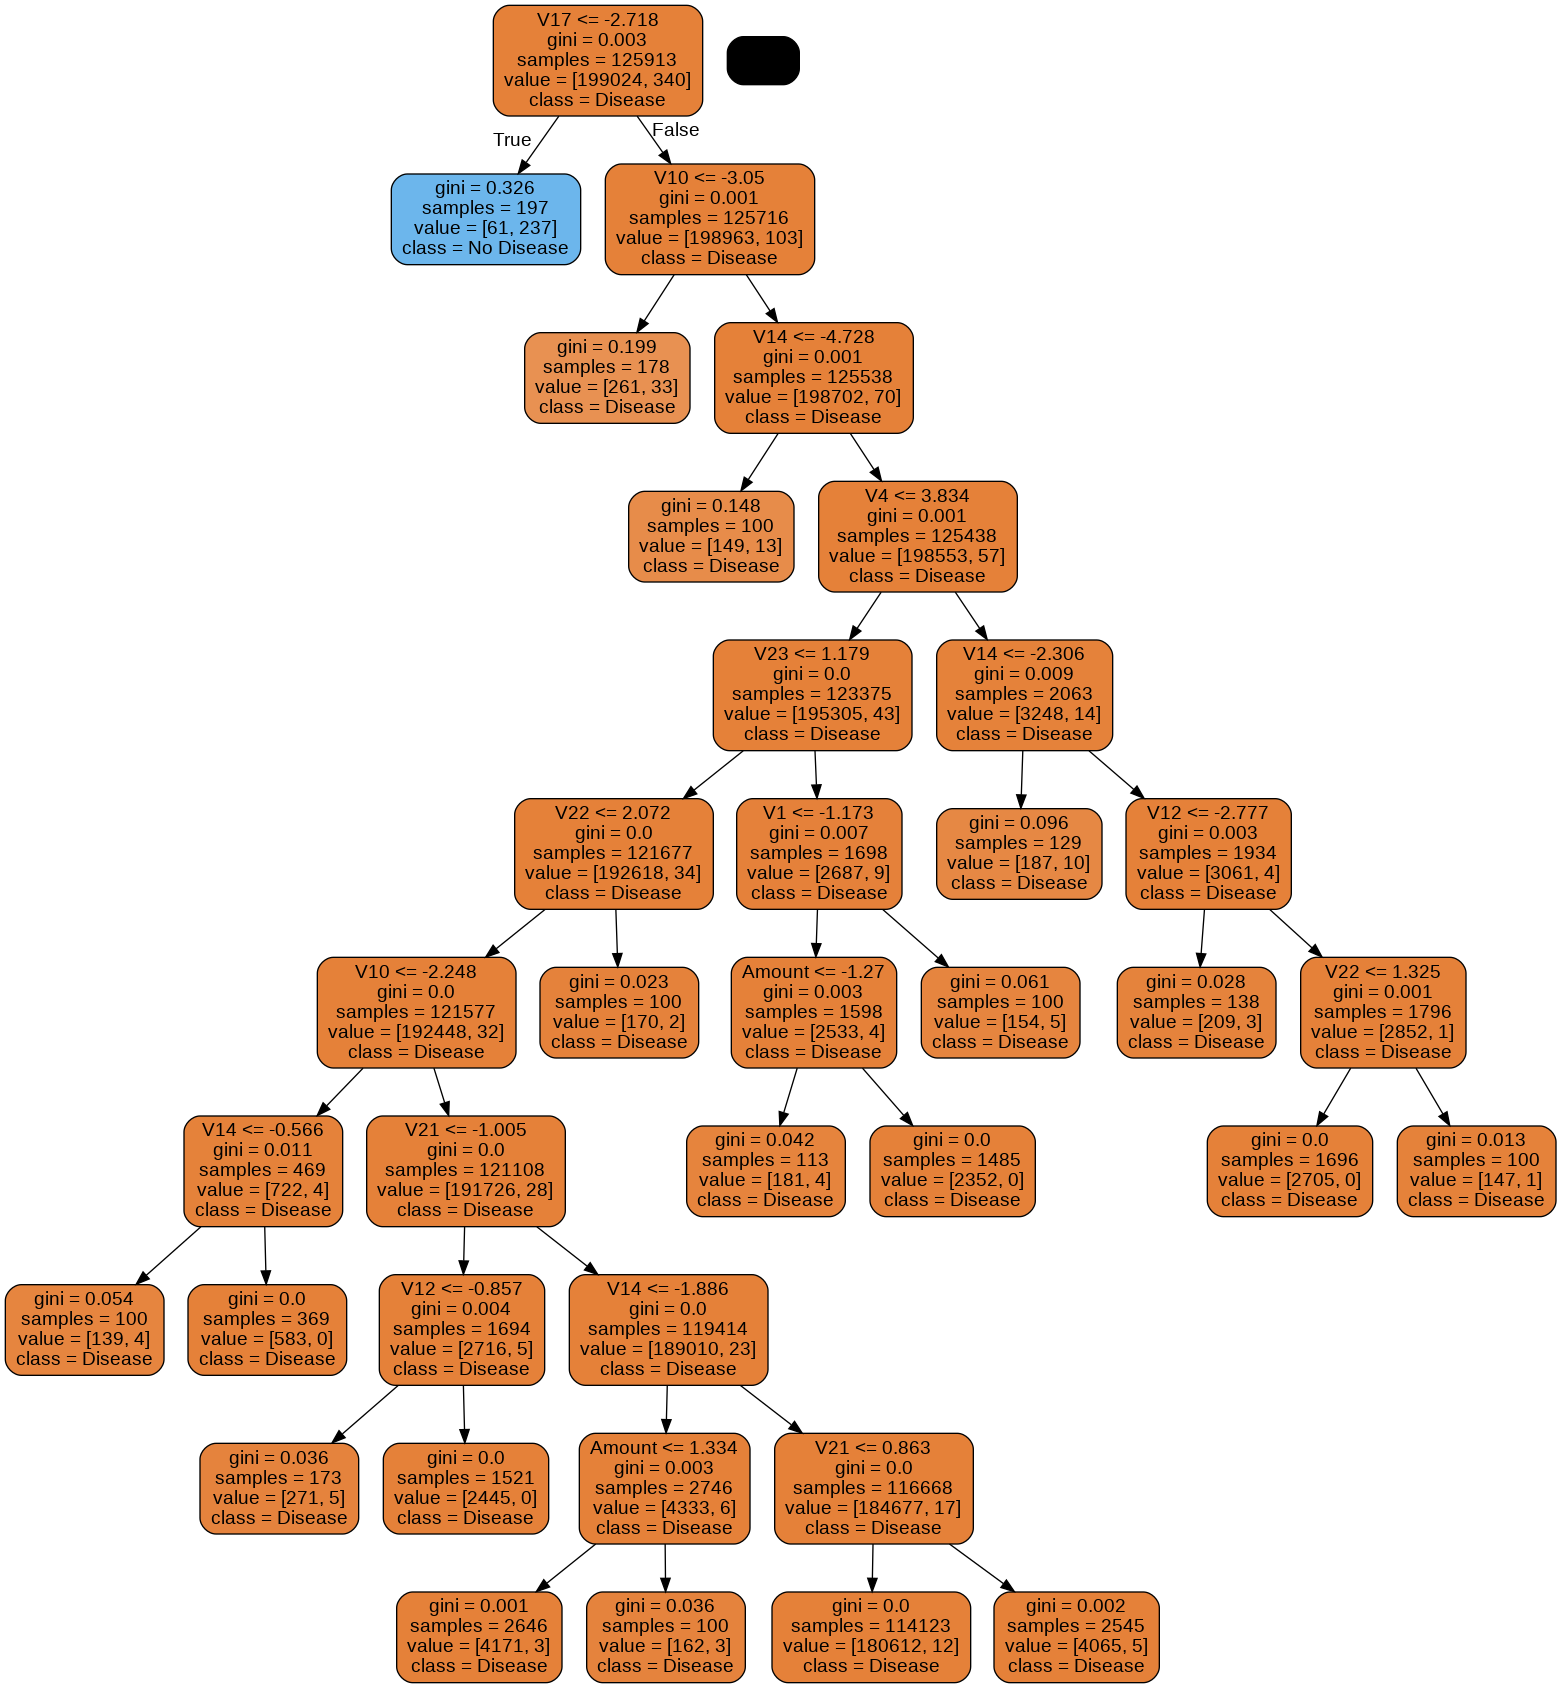

In [ ]:
sample_tree = best_model.estimators_[0]
gph = get_dt_graph(sample_tree)
Image(gph.create_png())

## Conclusion on Random Forest classifier model
- Model ROC_AUC score = 0.973
- Model training score = 0.86
- Model test score = 0.82

**XGBoost**

### Ideally I want to go with following params in grid search:
- 'n_estimators' : [100, 200, 500, 750], # no of trees 
- 'learning_rate' : [0.01, 0.02, 0.05, 0.1, 0.25],
- 'min_child_weight': [1, 5, 7, 10],
- 'gamma': [0.1, 0.5, 1, 1.5, 5],
- 'subsample': [0.6, 0.8, 1.0],
- 'colsample_bytree': [0.6, 0.8, 1.0],
- 'max_depth': [3, 4, 5, 10, 12]

But since this takes a lot of time running 72,000 combinations, I am using params as mentioned below in grid search.

In [ ]:
import xgboost as xgb
# Model
xgb_cfl = xgb.XGBClassifier(n_jobs = -1,objective = 'binary:logistic')

#Hyperparameter tuning
params = {
        'n_estimators' : [100, 200], # no of trees 
        'max_depth': [5, 10, 12]
        }

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=xgb_cfl, 
                           param_grid=params, 
                           cv=folds, verbose=10, scoring = "roc_auc", return_train_score=True)

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 6 candidates, totalling 24 fits
[CV 1/4; 1/6] START max_depth=5, n_estimators=100...............................
[CV 1/4; 1/6] END max_depth=5, n_estimators=100;, score=(train=1.000, test=0.975) total time=  35.5s
[CV 2/4; 1/6] START max_depth=5, n_estimators=100...............................
[CV 2/4; 1/6] END max_depth=5, n_estimators=100;, score=(train=1.000, test=0.981) total time=  35.0s
[CV 3/4; 1/6] START max_depth=5, n_estimators=100...............................
[CV 3/4; 1/6] END max_depth=5, n_estimators=100;, score=(train=1.000, test=0.979) total time=  37.1s
[CV 4/4; 1/6] START max_depth=5, n_estimators=100...............................
[CV 4/4; 1/6] END max_depth=5, n_estimators=100;, score=(train=1.000, test=0.975) total time=  35.2s
[CV 1/4; 2/6] START max_depth=5, n_estimators=200...............................
[CV 1/4; 2/6] END max_depth=5, n_estimators=200;, score=(train=1.000, test=0.977) total time= 1.2min
[CV 2/4; 2/6] START max_depth=

GridSearchCV(cv=KFold(n_splits=4, random_state=100, shuffle=True),
             estimator=XGBClassifier(n_jobs=-1),
             param_grid={'max_depth': [5, 10, 12], 'n_estimators': [100, 200]},
             return_train_score=True, scoring='roc_auc', verbose=10)

In [ ]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,35.569755,0.803872,0.133457,0.015870,5,100,"{'max_depth': 5, 'n_estimators': 100}",0.975321,0.981131,0.978634,0.974615,0.977425,0.002623,1,0.999976,0.999929,0.999908,0.999935,0.999937,0.000025
1,71.033224,0.904704,0.297099,0.005945,5,200,"{'max_depth': 5, 'n_estimators': 200}",0.976622,0.977620,0.973583,0.978360,0.976546,0.001819,4,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
2,50.134896,2.373285,0.126056,0.002758,10,100,"{'max_depth': 10, 'n_estimators': 100}",0.972228,0.984074,0.974608,0.974793,0.976425,0.004530,5,1.000000,0.999997,0.999995,0.999997,0.999997,0.000002
3,103.828448,8.799362,0.310299,0.020743,10,200,"{'max_depth': 10, 'n_estimators': 200}",0.974558,0.982724,0.974611,0.976539,0.977108,0.003339,3,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,49.431834,1.414759,0.134993,0.007624,12,100,"{'max_depth': 12, 'n_estimators': 100}",0.973693,0.980592,0.975339,0.973949,0.975893,0.002784,6,1.000000,0.999997,0.999993,0.999998,0.999997,0.000002


In [ ]:
grid_search.best_estimator_

XGBClassifier(max_depth=5, n_jobs=-1)

In [ ]:
grid_search.best_score_

0.9774254290103497

In [ ]:
best_model = grid_search.best_estimator_
#print the optimum value of hyperparameters
best_model.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 5,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': -1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


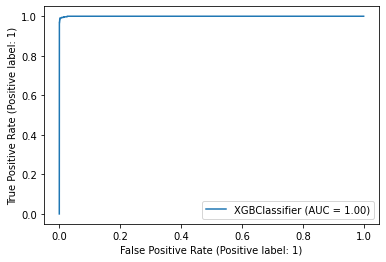

In [ ]:
plot_roc_curve(best_model, X_train, y_train)
plt.show()

Predicting on training data

In [ ]:
y_train_pred = best_model.predict(X_train)
"{:2.2}".format(metrics.roc_auc_score(y_train, y_train_pred))

'0.95'

Predicting on test data

In [ ]:
y_test_pred = best_model.predict(X_test)
"{:2.2}".format(metrics.roc_auc_score(y_test, y_test_pred))

'0.87'

## Conclusion on XGBoost model
- Model ROC_AUC score = 0.977
- Model training score = 0.95
- Model test score = 0.87

KNN (K Nearest Neighbour)
- We will test this model but we will not try hyperparameter tuning on this model. This is due to the fact that KNN model predicts the class of a data point by finding its K number of nearest neighbours and taking a majority vote. Hence this model is feasible only for datasets less than 10000. For larger data sets, the execution performance of this model is very slow.
- Since our data set is 280000, we will not use hyperparameter tuning on this model
- This model is being created only for demonstration purpose and its metrics will not be used in best model comparison.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# K must be odd as it calculates majority vote
k = 3
knn=KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train,y_train)
train_score = knn.score(X_train,y_train)
test_score = knn.score(X_test,y_test)

In [ ]:
print('Training score : ', train_score)

Training score :  0.9996538994000923


In [ ]:
print('Test score : ', test_score)

Test score :  0.9994265182636377


# Class balancing
The data set we have has 284807 data points with 284315 '0' and 492 '1' classes. This means that the data set is highly class imbalanced. We need to balance the class in data set. There are few ways to do that:
- Under sampling - We can drop class '0' rows such that there are 493 class '0' and '1'. This is not a very good approach as it will lead to loss of 90% of data
- Over sampling - We can create more class 1 data points from existing class 1 data points. Uniform and random over sampling techniques are used and both will not change the spread of the data. The scatter plots of dataset before and after sampling will remain sale.
- SMOTE (Synthetic Minority Oversampling technique) - A minority class data point is choses randomly and its nearest neighbour is found and a new data point is created in between the straight line between those points.
- Adasyn (Adaptive Synthetic) - Similar to SMOTE except that the data point is not chosen randomly. It is chosen from those area where there is less density of minority class.
- We will use SMOTE and ADASYN techniques for balancing. We will balance training data only.

In [16]:
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTE
X_train_adasyn_balanced, y_train_adasyn_balanced = ADASYN().fit_resample(X_train, y_train)
X_train_smote_balanced, y_train_smote_balanced = SMOTE().fit_resample(X_train, y_train)

In [ ]:
classes=y_train_adasyn_balanced.value_counts()
print(classes)

1    199046
0    199014
Name: Class, dtype: int64


In [ ]:
classes=y_train_smote_balanced.value_counts()
print(classes)

0    199014
1    199014
Name: Class, dtype: int64


We see above that we have almost equal number of each classes. So the training dataset is balanced.

Defining methods for each classification model

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [11]:
folds = KFold(n_splits = 4, shuffle = True, random_state = 100)

In [12]:
def logistic_regression(X_train_param, y_train_param):
  hyper_params = {"C": [1.0, 10.0, 0.01, 0.001, 0.075], "penalty": ["l1", "l2"]}
  logreg = LogisticRegression()
  logreg.fit(X_train_param, y_train_param)
  rfe = RFE(logreg) 
  model_cv = GridSearchCV(estimator = logreg, 
                          param_grid = hyper_params, 
                          scoring= 'roc_auc', 
                          cv = folds, 
                          verbose = 1,
                          return_train_score=True)   
  model_cv.fit(X_train_param, y_train_param)
  print ('Model ROC_AUC score = ', model_cv.best_score_)
  y_train_pred = best_model.predict(X_train_param)
  print ('Model training score = ', "{:2.2}".format(metrics.roc_auc_score(y_train_param, y_train_pred)))
  y_test_pred = best_model.predict(X_test)
  print('Model test score = ', "{:2.2}".format(metrics.roc_auc_score(y_test, y_test_pred)))

In [13]:
def decision_tree(X_train_param, y_train_param):
  dt = DecisionTreeClassifier(random_state=42)
  params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
  }
  grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=folds, verbose=1, scoring = "roc_auc", return_train_score=True)
  grid_search.fit(X_train, y_train)
  print ('Model ROC_AUC score = ', grid_search.best_score_)
  y_train_pred = grid_search.predict(X_train_param)
  print ('Model training score = ', "{:2.2}".format(metrics.roc_auc_score(y_train_param, y_train_pred)))
  y_test_pred = grid_search.predict(X_test)
  print('Model test score = ', "{:2.2}".format(metrics.roc_auc_score(y_test, y_test_pred)))

In [14]:
def random_forest(X_train_param, y_train_param):
  classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1)
  params = {
    'max_depth': [10, 20],
    'min_samples_leaf': [50, 100],
    'max_features': [20, 25, 29],
    'n_estimators': [20, 50]
  }
  grid_search = GridSearchCV(estimator=classifier_rf, param_grid=params, 
                          cv=folds, verbose=10, scoring = "roc_auc", return_train_score=True, n_jobs=1)
  grid_search.fit(X_train, y_train)
  print ('Model ROC_AUC score = ', grid_search.best_score_)
  y_train_pred = grid_search.predict(X_train_param)
  print ('Model training score = ', "{:2.2}".format(metrics.roc_auc_score(y_train_param, y_train_pred)))
  y_test_pred = grid_search.predict(X_test)
  print('Model test score = ', "{:2.2}".format(metrics.roc_auc_score(y_test, y_test_pred)))

In [19]:
def xgboost(X_train_param, y_train_param):
  xgb_cfl = xgb.XGBClassifier(n_jobs = -1,objective = 'binary:logistic')
  params = {
    'n_estimators' : [100, 200], # no of trees 
    'max_depth': [5, 10, 12]
  }
  grid_search = GridSearchCV(estimator=xgb_cfl, 
                           param_grid=params, 
                           cv=folds, verbose=10, scoring = "roc_auc", return_train_score=True)
  grid_search.fit(X_train, y_train)
  print ('Model ROC_AUC score = ', grid_search.best_score_)
  y_train_pred = grid_search.predict(X_train_param)
  print ('Model training score = ', "{:2.2}".format(metrics.roc_auc_score(y_train_param, y_train_pred)))
  y_test_pred = grid_search.predict(X_test)
  print('Model test score = ', "{:2.2}".format(metrics.roc_auc_score(y_test, y_test_pred)))

Logistic regression with ADASYS

In [ ]:
logistic_regression(X_train_adasyn_balanced, y_train_adasyn_balanced)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solver

Model ROC_AUC score =  0.9646833907804351
Model training score =  0.69
Model test score =  0.87


Logistic Regression with SMOTE

In [ ]:
logistic_regression(X_train_smote_balanced, y_train_smote_balanced)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solver

Model ROC_AUC score =  0.9902447235653873
Model training score =  0.92
Model test score =  0.87


Decision Tree with ADASYN

In [ ]:
decision_tree(X_train_adasyn_balanced, y_train_adasyn_balanced)

Fitting 4 folds for each of 50 candidates, totalling 200 fits
Model ROC_AUC score =  0.9595261854835309
Model training score =  0.64
Model test score =  0.82


Decision Tree with SMOTE

In [ ]:
decision_tree(X_train_smote_balanced, y_train_smote_balanced)

Fitting 4 folds for each of 50 candidates, totalling 200 fits
Model ROC_AUC score =  0.9595261854835309
Model training score =  0.86
Model test score =  0.82


Random Forest with ADASYN

In [ ]:
random_forest(X_train_adasyn_balanced, y_train_adasyn_balanced)

Fitting 4 folds for each of 24 candidates, totalling 96 fits
[CV 1/4; 1/24] START max_depth=10, max_features=20, min_samples_leaf=50, n_estimators=20
[CV 1/4; 1/24] END max_depth=10, max_features=20, min_samples_leaf=50, n_estimators=20;, score=(train=0.998, test=0.961) total time=  51.6s
[CV 2/4; 1/24] START max_depth=10, max_features=20, min_samples_leaf=50, n_estimators=20
[CV 2/4; 1/24] END max_depth=10, max_features=20, min_samples_leaf=50, n_estimators=20;, score=(train=0.997, test=0.970) total time=  53.8s
[CV 3/4; 1/24] START max_depth=10, max_features=20, min_samples_leaf=50, n_estimators=20
[CV 3/4; 1/24] END max_depth=10, max_features=20, min_samples_leaf=50, n_estimators=20;, score=(train=0.997, test=0.966) total time=  50.5s
[CV 4/4; 1/24] START max_depth=10, max_features=20, min_samples_leaf=50, n_estimators=20
[CV 4/4; 1/24] END max_depth=10, max_features=20, min_samples_leaf=50, n_estimators=20;, score=(train=0.999, test=0.962) total time=  50.0s
[CV 1/4; 2/24] START ma

Random Forest with SMOTE

In [17]:
random_forest(X_train_smote_balanced, y_train_smote_balanced)

Fitting 4 folds for each of 24 candidates, totalling 96 fits
[CV 1/4; 1/24] START max_depth=10, max_features=20, min_samples_leaf=50, n_estimators=20
[CV 1/4; 1/24] END max_depth=10, max_features=20, min_samples_leaf=50, n_estimators=20;, score=(train=0.998, test=0.961) total time= 1.0min
[CV 2/4; 1/24] START max_depth=10, max_features=20, min_samples_leaf=50, n_estimators=20
[CV 2/4; 1/24] END max_depth=10, max_features=20, min_samples_leaf=50, n_estimators=20;, score=(train=0.997, test=0.970) total time= 1.1min
[CV 3/4; 1/24] START max_depth=10, max_features=20, min_samples_leaf=50, n_estimators=20
[CV 3/4; 1/24] END max_depth=10, max_features=20, min_samples_leaf=50, n_estimators=20;, score=(train=0.997, test=0.966) total time= 1.0min
[CV 4/4; 1/24] START max_depth=10, max_features=20, min_samples_leaf=50, n_estimators=20
[CV 4/4; 1/24] END max_depth=10, max_features=20, min_samples_leaf=50, n_estimators=20;, score=(train=0.999, test=0.962) total time=  59.7s
[CV 1/4; 2/24] START ma

XGBoost with ADASYN

In [20]:
xgboost(X_train_adasyn_balanced, y_train_adasyn_balanced)

Fitting 4 folds for each of 6 candidates, totalling 24 fits
[CV 1/4; 1/6] START max_depth=5, n_estimators=100...............................
[CV 1/4; 1/6] END max_depth=5, n_estimators=100;, score=(train=1.000, test=0.975) total time=  57.3s
[CV 2/4; 1/6] START max_depth=5, n_estimators=100...............................
[CV 2/4; 1/6] END max_depth=5, n_estimators=100;, score=(train=1.000, test=0.981) total time=  47.7s
[CV 3/4; 1/6] START max_depth=5, n_estimators=100...............................
[CV 3/4; 1/6] END max_depth=5, n_estimators=100;, score=(train=1.000, test=0.979) total time=  49.3s
[CV 4/4; 1/6] START max_depth=5, n_estimators=100...............................
[CV 4/4; 1/6] END max_depth=5, n_estimators=100;, score=(train=1.000, test=0.975) total time=  45.9s
[CV 1/4; 2/6] START max_depth=5, n_estimators=200...............................
[CV 1/4; 2/6] END max_depth=5, n_estimators=200;, score=(train=1.000, test=0.977) total time= 1.5min
[CV 2/4; 2/6] START max_depth=

XGBoost with SMOTE

In [21]:
xgboost(X_train_smote_balanced, y_train_smote_balanced)

Fitting 4 folds for each of 6 candidates, totalling 24 fits
[CV 1/4; 1/6] START max_depth=5, n_estimators=100...............................
[CV 1/4; 1/6] END max_depth=5, n_estimators=100;, score=(train=1.000, test=0.975) total time=  48.0s
[CV 2/4; 1/6] START max_depth=5, n_estimators=100...............................
[CV 2/4; 1/6] END max_depth=5, n_estimators=100;, score=(train=1.000, test=0.981) total time=  46.7s
[CV 3/4; 1/6] START max_depth=5, n_estimators=100...............................
[CV 3/4; 1/6] END max_depth=5, n_estimators=100;, score=(train=1.000, test=0.979) total time=  48.7s
[CV 4/4; 1/6] START max_depth=5, n_estimators=100...............................
[CV 4/4; 1/6] END max_depth=5, n_estimators=100;, score=(train=1.000, test=0.975) total time=  46.8s
[CV 1/4; 2/6] START max_depth=5, n_estimators=200...............................
[CV 1/4; 2/6] END max_depth=5, n_estimators=200;, score=(train=1.000, test=0.977) total time= 1.5min
[CV 2/4; 2/6] START max_depth=

# Compare the performance of models

In [29]:
# Preparing a data frame with train and test performance of all models that were run on un-balanced data. The train and test scores have been picked from the conclusion sections for each mode.
# Since KNN model was done only for demonstration purpose, hence I have not included its performance in the comparison dataframe below.
unbalanced_model_comparison = pd.DataFrame({'Train score': ['0.77', '0.86', '0.86', '0.95'], 'Test score': ['0.76', '0.82', '0.82', '0.87']}, index=['Logistic Regression', 'Decision Trees', 'Random Forest', 'XGBoost'])

### Un-Balanced model comparison

In [30]:
unbalanced_model_comparison

,Train score,Test score
Logistic Regression,0.77,0.76
Decision Trees,0.86,0.82
Random Forest,0.86,0.82
XGBoost,0.95,0.87


## Clearly XGBoost gave best performance in training and test data with un-balanced data set

In [28]:
# Preparing a data frame with train and test performance of all models that were run on balanced data. The train and test scores have been picked from the conclusion sections for each mode.
# Since KNN model was done only for demonstration purpose, hence I have not included its performance in the comparison dataframe below.
adasyn_balanced_model_comparison = pd.DataFrame({'Train score': ['0.69', '0.64', '0.63', '0.73'], 'Test score': ['0.87', '0.82', '0.82', '0.89']}, index=['Logistic Regression', 'Decision Trees', 'Random Forest', 'XGBoost'])
smote_balanced_model_comparison = pd.DataFrame({'Train score': ['0.92', '0.86', '0.86', '0.93'], 'Test score': ['0.87', '0.82', '0.82', '0.89']}, index=['Logistic Regression', 'Decision Trees', 'Random Forest', 'XGBoost'])

### ADASYN balanced model comparison

In [31]:
adasyn_balanced_model_comparison

,Train score,Test score
Logistic Regression,0.69,0.87
Decision Trees,0.64,0.82
Random Forest,0.63,0.82
XGBoost,0.73,0.89


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


### SMOTE balanced model comparison

In [32]:
smote_balanced_model_comparison

,Train score,Test score
Logistic Regression,0.92,0.87
Decision Trees,0.86,0.82
Random Forest,0.86,0.82
XGBoost,0.93,0.89


# Comparing the model performance in above tables, we see that 
- XGBoost has the best training and test performance with balanced and un-balanced data. 
- Balancing the data with Adasyn or Smote inproves model performance
- SMOTE improves performance better than Adasyn

**Conclusion: I will use XGBoost model and balance train data with SMOTE as it gives best train ROC_AUC score = 0.93 and test ROC_AUC score = 0.89**

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

### Lets run the best model again - XGBoost with SMOTE balanced training data

In [34]:
xgb_cfl = xgb.XGBClassifier(n_jobs = -1,objective = 'binary:logistic')
params = {
  'n_estimators' : [100, 200], # no of trees 
  'max_depth': [5, 10, 12]
}
grid_search = GridSearchCV(estimator=xgb_cfl, 
                          param_grid=params, 
                          cv=folds, verbose=10, scoring = "roc_auc", return_train_score=True)
grid_search.fit(X_train_smote_balanced, y_train_smote_balanced)
print ('Model ROC_AUC score = ', grid_search.best_score_)
y_train_pred = grid_search.predict(X_train_smote_balanced)
print ('Model training score = ', "{:2.2}".format(metrics.roc_auc_score(y_train_smote_balanced, y_train_pred)))
y_test_pred = grid_search.predict(X_test)
print('Model test score = ', "{:2.2}".format(metrics.roc_auc_score(y_test, y_test_pred)))

Fitting 4 folds for each of 6 candidates, totalling 24 fits
[CV 1/4; 1/6] START max_depth=5, n_estimators=100...............................
[CV 1/4; 1/6] END max_depth=5, n_estimators=100;, score=(train=1.000, test=1.000) total time= 2.0min
[CV 2/4; 1/6] START max_depth=5, n_estimators=100...............................
[CV 2/4; 1/6] END max_depth=5, n_estimators=100;, score=(train=1.000, test=1.000) total time= 2.0min
[CV 3/4; 1/6] START max_depth=5, n_estimators=100...............................
[CV 3/4; 1/6] END max_depth=5, n_estimators=100;, score=(train=1.000, test=1.000) total time= 2.0min
[CV 4/4; 1/6] START max_depth=5, n_estimators=100...............................
[CV 4/4; 1/6] END max_depth=5, n_estimators=100;, score=(train=1.000, test=1.000) total time= 1.9min
[CV 1/4; 2/6] START max_depth=5, n_estimators=200...............................
[CV 1/4; 2/6] END max_depth=5, n_estimators=200;, score=(train=1.000, test=1.000) total time= 4.4min
[CV 2/4; 2/6] START max_depth=

**Variable importance for best model**

In [39]:
best_model = grid_search.best_estimator_
best_model.feature_importances_

array([0.0107658 , 0.00738107, 0.01616495, 0.04967957, 0.00795526,
       0.00245614, 0.00681222, 0.01508031, 0.00616572, 0.01384419,
       0.01011436, 0.02215804, 0.01833575, 0.71112126, 0.00822685,
       0.00845843, 0.00650574, 0.00730961, 0.00555979, 0.00583201,
       0.00527004, 0.0052725 , 0.00419741, 0.00297301, 0.0081903 ,
       0.00925099, 0.01104018, 0.00547118, 0.00840734], dtype=float32)

In [41]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": best_model.feature_importances_
})

In [42]:
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
13,V14,0.711121
3,V4,0.049680
11,V12,0.022158
12,V13,0.018336
2,V3,0.016165
7,V8,0.015080
9,V10,0.013844
26,V27,0.011040
0,V1,0.010766
10,V11,0.010114


Top var = 14
2nd Top var = 4
3rd Top var = 12


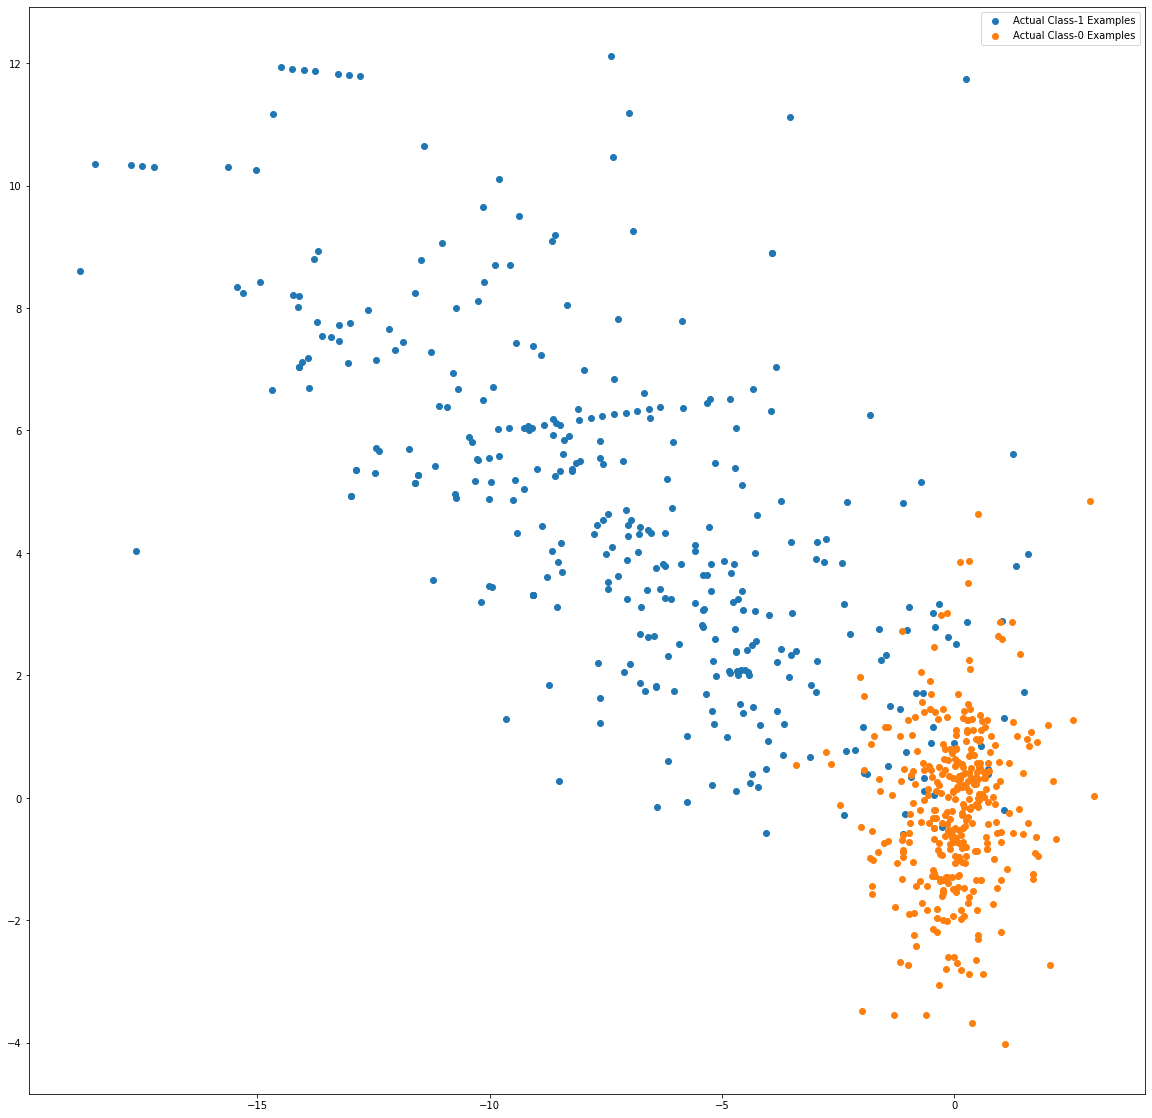

In [40]:
var_imp = []
clf = best_model
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()